<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# **Space X  Falcon 9 First Stage Landing Prediction**

## Assignment:  Machine Learning Prediction

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)

Several examples of an unsuccessful landing are shown here:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)

Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.

## Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\- Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data

In [24]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [26]:
from io import StringIO
import requests

url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(StringIO(requests.get(url1).text))
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [27]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(StringIO(requests.get(url2).text))
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [28]:
Y = data['Class'].to_numpy()
Y[:5]

array([0, 0, 0, 0, 0])

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [29]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples

In [31]:
Y_test.shape

(18,)

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [32]:
parameters = {'C':[0.01, 0.1, 1],
              'penalty':['l2'], # l1 lasso, l2 ridge
              'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, scoring='accuracy', cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [33]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Calculate the accuracy on the test data using the method <code>score</code>:

In [34]:
logreg_cv_score = logreg_cv.score(X_test, Y_test)
logreg_cv_score

0.8333333333333334

Lets look at the confusion matrix:

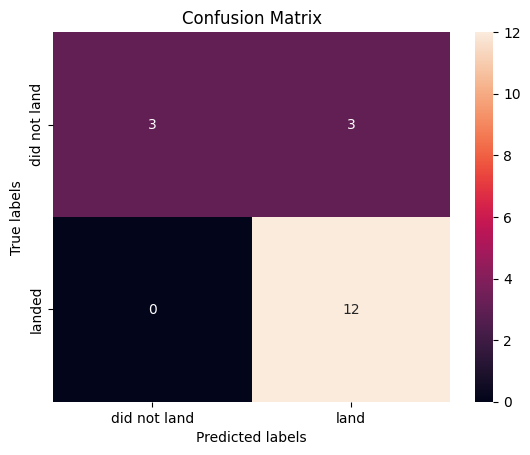

In [35]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)
</p></p>
Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [36]:
# Define parameters for SVC
parameters = {
    'kernel':('linear', 'rbf','poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma':np.logspace(-3, 3, 5)
}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object with SVM
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=10)

# Fit the object to the training data
svm_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Calculate the accuracy on the test data using the method <code>score</code>:

In [37]:
svm_cv_score = svm_cv.score(X_test, Y_test)
svm_cv_score

0.8333333333333334

We can plot the confusion matrix

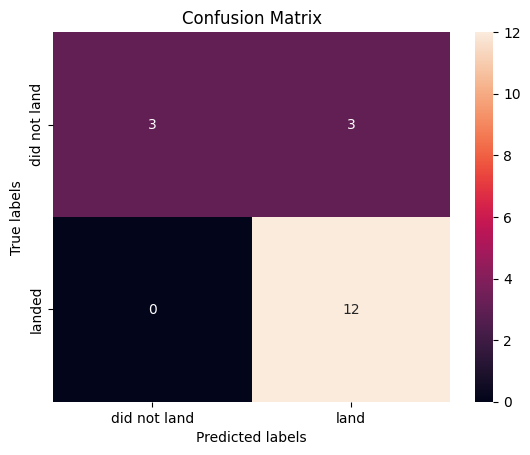

In [38]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [39]:
# Define parameters for Decision Tree
parameters = {
    'criterion': ['gini', 'entropy'],           # Splitting criterion
    'splitter': ['best', 'random'],             # Strategy for choosing the split
    'max_depth': [2 * n for n in range(1, 10)], # Maximum depth of the tree
    'max_features': ['sqrt', 'log2', None],     # Number of features to consider for the best split
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples at a leaf node
    'min_samples_split': [2, 5, 10]             # Minimum number of samples required to split a node
}

# Create a Decision Tree classifier object
tree = DecisionTreeClassifier()

# Create a GridSearchCV object with the decision tree
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, scoring='accuracy', cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters: (best parameters) ", tree_cv.best_params_)
print("Best accuracy: ", tree_cv.best_score_)


Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best accuracy:  0.8767857142857143


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [40]:
tree_cv_score = tree_cv.score(X_test, Y_test)
tree_cv_score

0.9444444444444444

We can plot the confusion matrix

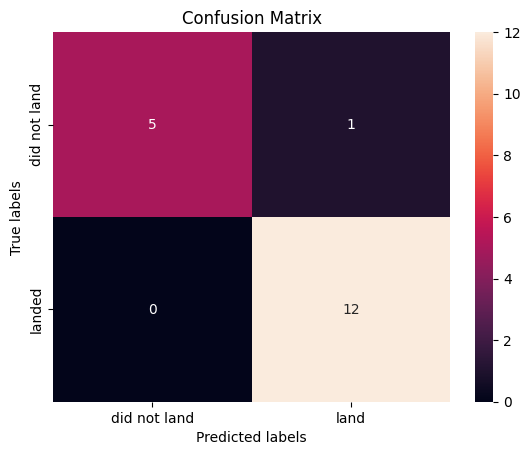

In [41]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [42]:
# Define the parameters to tune
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Number of neighbors to use
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm to compute nearest neighbors
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object with KNN
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters, scoring='accuracy', cv=10)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, Y_train)

# Print the best parameters and the best accuracy score
print("Tuned hyperparameters: (best parameters) ", knn_cv.best_params_)
print("Best accuracy: ", knn_cv.best_score_)

Tuned hyperparameters: (best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Best accuracy:  0.8482142857142858


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [43]:
knn_cv_score = knn_cv.score(X_test, Y_test)
knn_cv_score

0.8333333333333334

We can plot the confusion matrix

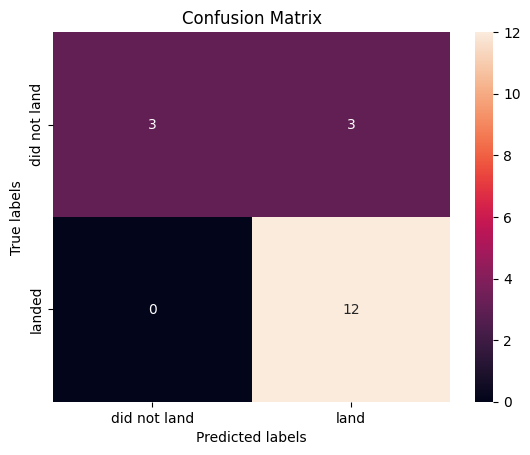

In [44]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

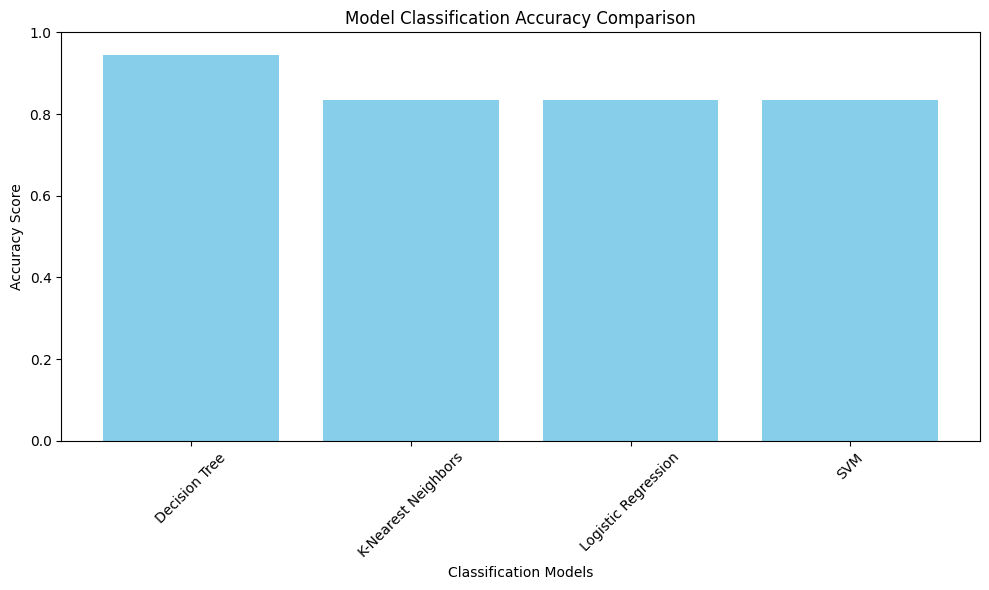

In [45]:
import matplotlib.pyplot as plt

model_scores = {
    "Decision Tree": tree_cv_score,
    "K-Nearest Neighbors": knn_cv_score,
    "Logistic Regression": logreg_cv_score,
    "SVM": svm_cv_score
}

# Bar chart visualization
plt.figure(figsize=(10, 6))
plt.bar(model_scores.keys(), model_scores.values(), color='skyblue')
plt.xlabel("Classification Models")
plt.ylabel("Accuracy Score")
plt.title("Model Classification Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart compares the accuracy (calculated using the method score) of four classification models: Decision Tree, K-Nearest Neighbors, Logistic Regression, and SVM(Support Vector Machine).​

The y-axis shows the accuracy scores, ranging from 0 to 1, while each model is represented along the x-axis.​

​

Best Model: Decision Tree has the highest accuracy score, suggesting it may be the best option among these models for this task.